In [1]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import statsmodels.api as sm
from statsmodels.formula.api import ols


c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
time1 = pickle.load(open( '../00_data/final/competence_time1.pkl','rb') )
time2 = pickle.load(open( '../00_data/final/competence_time2.pkl','rb') )
time2 = time2.rename(columns={"ability": "ability_t2"})
time2 = time2[['UserID','ability_t2']]
time1 = time1.rename(columns={"ability": "ability_t1"})

final = pd.merge(time1, time2, on='UserID',how='inner')
final['change'] = final.ability_t2-final.ability_t1

In [3]:
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]


In [4]:
ability_by_group = final.groupby(['interventiongroup']).agg({'ability_t1':'median','ability_t2':'median','change':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability_t1,ability_t2,change,count
interventiongroup,,,,
2,1.77200,3.638980,1.362670,5
3,2.06844,3.311495,1.074480,10
4,1.89165,3.555660,1.602655,14
5,1.95187,2.915450,1.551760,5
6,2.29880,4.409360,2.110560,3
control,2.52700,3.595030,1.153380,17


In [5]:
ability_by_group = final.groupby(['interventiongroup']).agg({'ability_t1':'mean','ability_t2':'mean','change':'mean','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability_t1,ability_t2,change,count
interventiongroup,,,,
2,2.019470,3.257086,1.237616,5
3,1.928029,3.112290,1.184261,10
4,1.226190,2.777409,1.551219,14
5,1.749710,3.131852,1.382142,5
6,2.477313,4.703530,2.226217,3
control,1.819067,3.040702,1.221635,17


<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

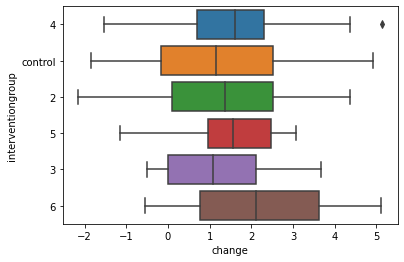

In [6]:
sns.boxplot(data=final, x="change", y="interventiongroup",showfliers = True)


In [7]:
# Kruskal Wallis Test 
stats.kruskal(intvcontrol['change'], intv2['change'], intv3['change'],intv4['change'],intv5['change'],intv6['change'])


KruskalResult(statistic=0.7056503409444872, pvalue=0.9826571324251009)